Upload and Extract Dataset

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload archive (8).zip

import zipfile
import os

with zipfile.ZipFile("archive (8).zip", 'r') as zip_ref:
    zip_ref.extractall("digit_data")

os.listdir("digit_data")  # See extracted files


Saving archive (8).zip to archive (8).zip


['3-0bfzbgIz.png',
 '8-0att0t6L.png',
 '9-0Btbgorm.png',
 '2-0A0ObPTk.png',
 '5-0AcTFYtW.png',
 '0-9 test images',
 '1-0Bz4VjBL.png',
 '0-ZLKsU037.png',
 '0-9 traning images',
 '6-0aJMgoeK.png',
 '4-0AgBIz06.png',
 '7-0CWwvINB.png']

Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau


Load & Prepare Dataset

In [7]:
os.listdir("digit_data")


['3-0bfzbgIz.png',
 '8-0att0t6L.png',
 '9-0Btbgorm.png',
 '2-0A0ObPTk.png',
 '5-0AcTFYtW.png',
 '0-9 test images',
 '1-0Bz4VjBL.png',
 '0-ZLKsU037.png',
 '0-9 traning images',
 '6-0aJMgoeK.png',
 '4-0AgBIz06.png',
 '7-0CWwvINB.png']

In [8]:
['train.csv', 'test.csv']


['train.csv', 'test.csv']

In [9]:
import os
for root, dirs, files in os.walk("digit_data"):
    for name in files:
        print(os.path.join(root, name))


Streaming output truncated to the last 5000 lines.
digit_data/0-9 traning images/0-9 traning images/8-HOBx2M51.png
digit_data/0-9 traning images/0-9 traning images/7-CSzZrDhv.png
digit_data/0-9 traning images/0-9 traning images/1-VmMbeTXU.png
digit_data/0-9 traning images/0-9 traning images/0-HObty87I.png
digit_data/0-9 traning images/0-9 traning images/9-ShNoUYBv.png
digit_data/0-9 traning images/0-9 traning images/0-wn3e5VGW.png
digit_data/0-9 traning images/0-9 traning images/1-SzquvhYE.png
digit_data/0-9 traning images/0-9 traning images/8-E2aDob4D.png
digit_data/0-9 traning images/0-9 traning images/9-q7xB2IIM.png
digit_data/0-9 traning images/0-9 traning images/3-O6pmOPMr.png
digit_data/0-9 traning images/0-9 traning images/9-nhK9Z7qs.png
digit_data/0-9 traning images/0-9 traning images/6-2lsSgUn8.png
digit_data/0-9 traning images/0-9 traning images/7-3fHs7pbL.png
digit_data/0-9 traning images/0-9 traning images/2-Wj6KQOAt.png
digit_data/0-9 traning images/0-9 traning images/1-5S

In [11]:
import zipfile
import os

with zipfile.ZipFile("archive (8).zip", 'r') as zip_ref:
    zip_ref.extractall("digit_data")

# Check the structure of the dataset
for root, dirs, files in os.walk("digit_data"):
    for name in files:
        print(os.path.join(root, name))


Streaming output truncated to the last 5000 lines.
digit_data/0-9 traning images/0-9 traning images/8-HOBx2M51.png
digit_data/0-9 traning images/0-9 traning images/7-CSzZrDhv.png
digit_data/0-9 traning images/0-9 traning images/1-VmMbeTXU.png
digit_data/0-9 traning images/0-9 traning images/0-HObty87I.png
digit_data/0-9 traning images/0-9 traning images/9-ShNoUYBv.png
digit_data/0-9 traning images/0-9 traning images/0-wn3e5VGW.png
digit_data/0-9 traning images/0-9 traning images/1-SzquvhYE.png
digit_data/0-9 traning images/0-9 traning images/8-E2aDob4D.png
digit_data/0-9 traning images/0-9 traning images/9-q7xB2IIM.png
digit_data/0-9 traning images/0-9 traning images/3-O6pmOPMr.png
digit_data/0-9 traning images/0-9 traning images/9-nhK9Z7qs.png
digit_data/0-9 traning images/0-9 traning images/6-2lsSgUn8.png
digit_data/0-9 traning images/0-9 traning images/7-3fHs7pbL.png
digit_data/0-9 traning images/0-9 traning images/2-Wj6KQOAt.png
digit_data/0-9 traning images/0-9 traning images/1-5S

In [12]:
import os
import shutil
from pathlib import Path
from PIL import Image

# Create cleaned directory
base_dir = "digit_data/clean_digits"
os.makedirs(base_dir, exist_ok=True)

src_folder = "digit_data/0-9 traning images/0-9 traning images"

# Organize images into class-wise folders
for img_file in os.listdir(src_folder):
    if img_file.endswith('.png'):
        label = img_file[0]  # First character is label
        label_dir = os.path.join(base_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        src_path = os.path.join(src_folder, img_file)
        dest_path = os.path.join(label_dir, img_file)
        shutil.copyfile(src_path, dest_path)

# Verify structure
for folder in os.listdir(base_dir):
    print(f"{folder}: {len(os.listdir(os.path.join(base_dir, folder)))} images")


8: 5851 images
7: 6265 images
6: 5918 images
5: 5421 images
1: 6742 images
2: 5958 images
9: 5949 images
4: 5842 images
0: 5923 images
3: 6131 images


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load images as grayscale, 28x28
hs12 = train_gen.flow_from_directory(
    base_dir,
    target_size=(28,28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_gen.flow_from_directory(
    base_dir,
    target_size=(28,28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 48004 images belonging to 10 classes.
Found 11996 images belonging to 10 classes.


Build CNN Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    hs12,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1501/1501 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8485 - loss: 0.4805 - val_accuracy: 0.9805 - val_loss: 0.0609
Epoch 2/15
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.9728 - loss: 0.0933 - val_accuracy: 0.9857 - val_loss: 0.0443
Epoch 3/15
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.9814 - loss: 0.0642 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 4/15
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.9846 - loss: 0.0481 - val_accuracy: 0.9892 - val_loss: 0.0330
Epoch 5/15
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 64s 42ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9894 - val_loss: 0.0346
Epoch 6/15
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.9900 - loss: 0.0340 - val_accuracy: 0.9904 - val_loss: 0.0300
Epoch 7/15
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 64s 42ms/step - accuracy: 0.9905 - loss: 0.0315 - val_accuracy: 0.9910 - val_loss: 0.0330
Epoch 8/15
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - accuracy: 0.9909 - loss: 0.02

Plot Accuracy and Loss



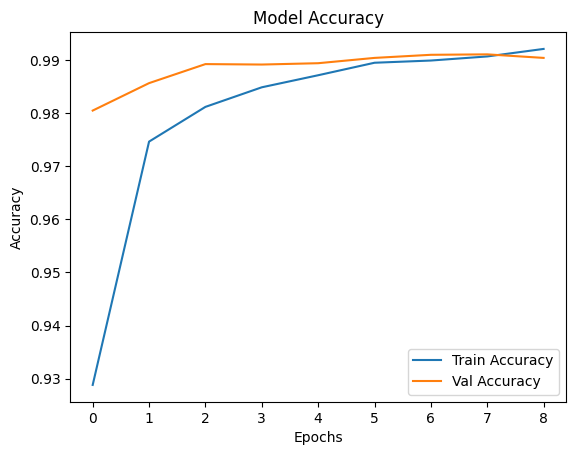

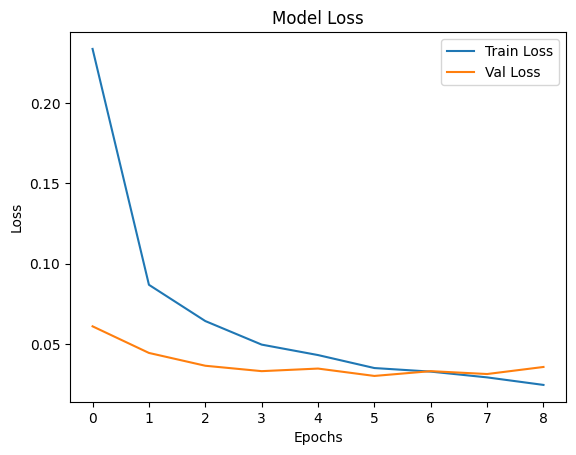

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Confusion Matrix & Evaluation

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step


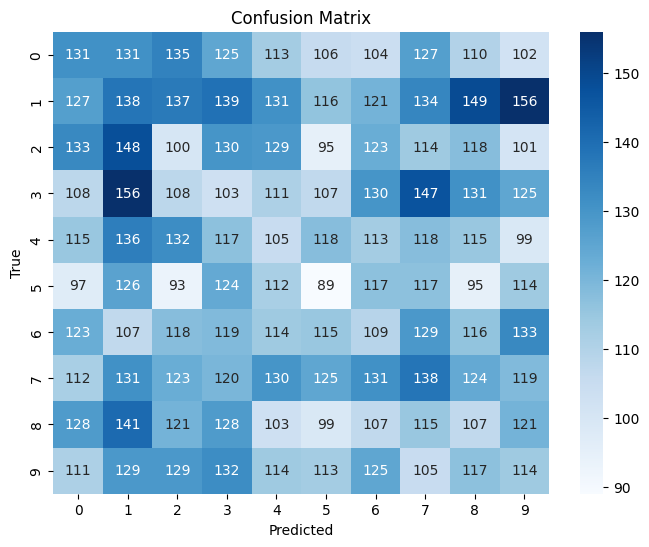

              precision    recall  f1-score   support

           0       0.11      0.11      0.11      1184
           1       0.10      0.10      0.10      1348
           2       0.08      0.08      0.08      1191
           3       0.08      0.08      0.08      1226
           4       0.09      0.09      0.09      1168
           5       0.08      0.08      0.08      1084
           6       0.09      0.09      0.09      1183
           7       0.11      0.11      0.11      1253
           8       0.09      0.09      0.09      1170
           9       0.10      0.10      0.10      1189

    accuracy                           0.09     11996
   macro avg       0.09      0.09      0.09     11996
weighted avg       0.09      0.09      0.09     11996



In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
val_preds = model.predict(val_data)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_data.classes

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred))


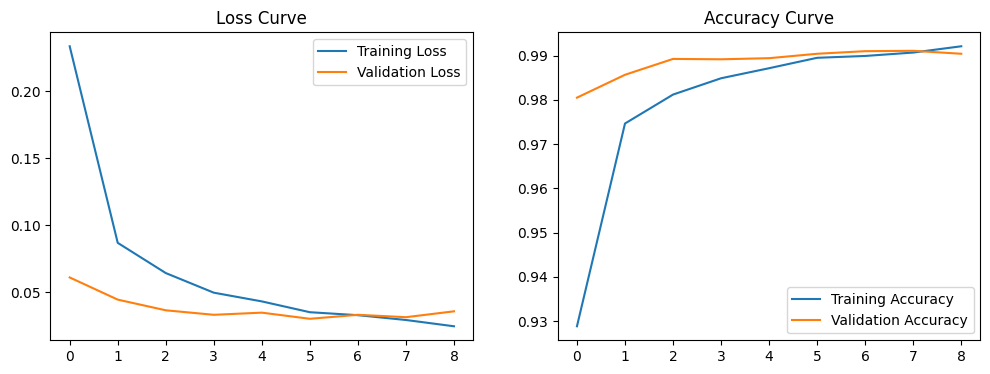

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.show()


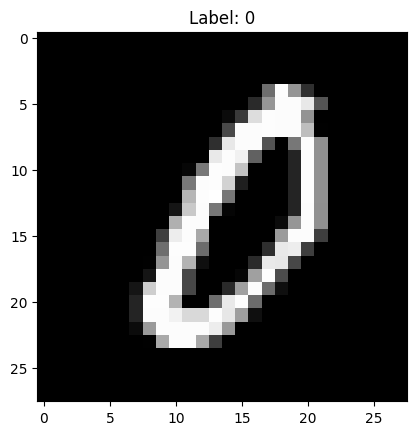

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
img_batch, label_batch = hs12.__next__() # Use __next__() instead of next()

# Display the first image in the batch
plt.imshow(img_batch[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(label_batch[0])}")
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step


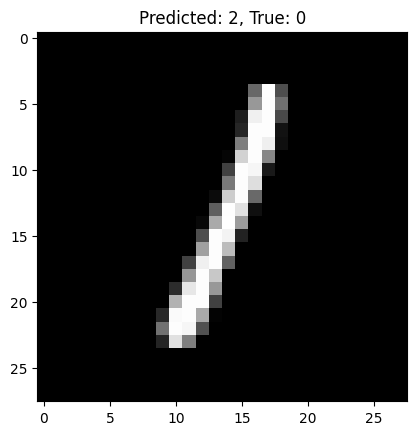

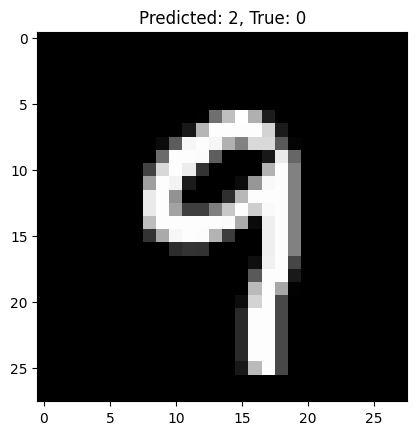

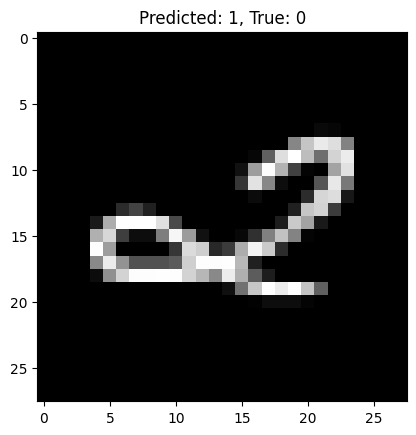

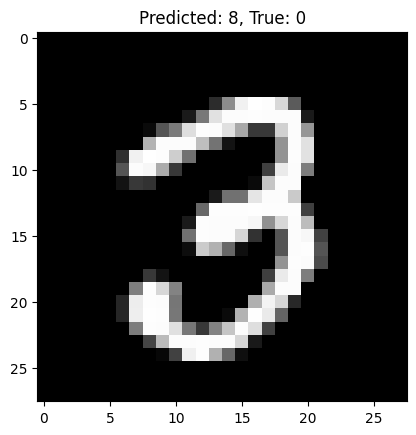

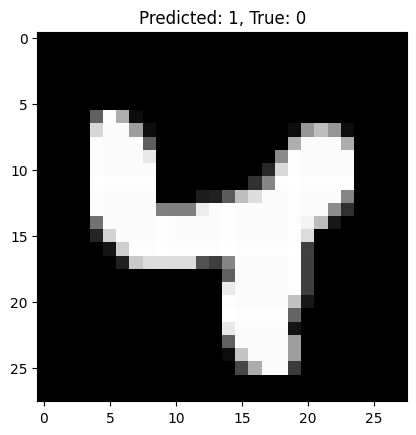

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions on the validation data
val_preds = model.predict(val_data)
y_pred = np.argmax(val_preds, axis=1)  # Get predicted labels
y_true = val_data.classes  # Get true labels

# Calculate errors
errors = y_pred != y_true  # Boolean array indicating errors

# Get indices of incorrect predictions
error_indices = np.where(errors)[0]

# Display some incorrect predictions
num_errors_to_display = 5  # Number of errors to display
for i in range(min(num_errors_to_display, len(error_indices))):
    error_index = error_indices[i]
    plt.imshow(val_data[error_index // val_data.batch_size][0][error_index % val_data.batch_size].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[error_index]}, True: {y_true[error_index]}")
    plt.show()

In [25]:
def calculate_average(numbers):
  """Calculates the average of a list of numbers.

  Args:
    numbers: A list of numbers.

  Returns:
    The average of the numbers in the list.
  """
  total = sum(numbers)
  count = len(numbers)
  average = total / count
  return average

my_list = [1, 2, 3, 4, 5]
average = calculate_average(my_list)
print(f"The average is: {average}")

The average is: 3.0


In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [34]:
results = model.predict(X_data)  # Assuming X_data contains your preprocessed test data
results = np.argmax(results, axis=1)  # Get the class with highest probability

1501/1501 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step


In [35]:
import os
import numpy as np
from PIL import Image

# ... (Code to load X_data as shown in previous response) ...

# Get predictions
results = model.predict(X_data)
results = np.argmax(results, axis=1)

# Create the output directory if it doesn't exist
output_dir = 'predicted_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the test images and save them with predicted labels
for i, image in enumerate(X_data):  # Iterate over the image data in X_data
    predicted_label = results[i]  # Get the predicted label for the current image
    image_data = (image.reshape(28, 28) * 255).astype(np.uint8)  # Reshape and scale to 0-255
    image = Image.fromarray(image_data, mode='L')  # Create a PIL Image object

    # Generate the output filename with .png extension
    image_filename = os.path.join(output_dir, f'image_{i}_predicted_{predicted_label}.png')

    # Save the image as PNG
    image.save(image_filename, format='PNG')

print(f"Images saved to '{output_dir}' directory.")

1501/1501 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step
Images saved to 'predicted_images' directory.


In [39]:
import os

In [40]:
test_data_dir = 'digit_data/clean_digits'  # Replace with the path to your test images
image_ids = [f for f in os.listdir(test_data_dir) if os.path.isfile(os.path.join(test_data_dir, f))]

In [43]:
import os

total_samples = len(hs12) * hs12.batch_size  # Calculate total samples
image_ids = [f"image_{i}.png" for i in range(total_samples)]  # Create filenames

In [45]:
print(len(image_ids))
print(len(results))

48032
48004


In [47]:
predicted_indices = list(range(50))
image_ids = [image_ids[i] for i in predicted_indices]

In [48]:
import os
import pandas as pd

# Assuming you have already made predictions on the test data using your model
# and have the results in a variable called 'results'

# Get the image data from the hs12 DirectoryIterator
X_data = []
y_data = []
for _ in range(len(hs12)):  # Iterate through all batches in the iterator
    x, y = hs12.__next__() # Use __next__() instead of next()
    X_data.extend(x)
    y_data.extend(y)
X_data = np.array(X_data)
y_data = np.array(y_data)

# Get predictions
results = model.predict(X_data)
results = np.argmax(results, axis=1)


# Generate image IDs based on the number of samples in hs12
total_samples = len(hs12) * hs12.batch_size
image_ids = [f"image_{i}.png" for i in range(total_samples)]

# Ensure that the lengths of image_ids and results match
image_ids = image_ids[:len(results)]  # Trim image_ids to match results length

# Create a DataFrame for submission
submission_df = pd.DataFrame({'ImageId': image_ids, 'Label': results})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

1501/1501 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step
Submission file created: submission.csv
